In [1]:
import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter, freqz
from scipy import signal as sg
import matplotlib.pyplot as plt

%matplotlib inline

def butter_lowpass(cutoff, fs, order=5, ftype = False):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=ftype)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5, ftype = False):
    b, a = butter_lowpass(cutoff, fs, order=order, ftype= ftype)
    y = lfilter(b, a, data)
    return y




In [2]:
df = pd.read_excel("Problem statement.xlsx")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33070 entries, 0 to 33069
Data columns (total 4 columns):
Timestamp              33070 non-null datetime64[ns]
Speed                  33070 non-null float64
Cumulative Distance    33070 non-null int64
Fuel Level (mV)        33070 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 1.0 MB


In [16]:
df.describe()

,Speed,Cumulative Distance,Fuel Level (mV)
count,33070.000000,3.307000e+04,33070.000000
mean,27.298125,2.192976e+06,613.757121
std,13.459000,1.018111e+06,69.923635
min,0.100000,0.000000e+00,0.000000
25%,17.400000,1.380314e+06,589.000000
50%,28.700000,2.189484e+06,614.000000
75%,37.500000,3.077728e+06,651.000000
max,65.000000,3.937774e+06,758.000000


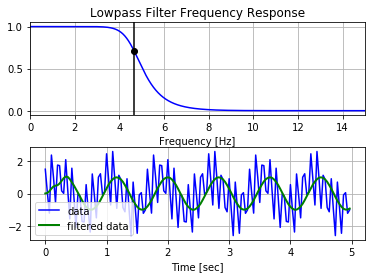

In [3]:
# Filter requirements.
order = 6
fs = 30.0       # sample rate, Hz
cutoff = 4.667  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, worN=8000)

plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()


# Demonstrate the use of the filter.
# First make some data to be filtered.
T = 5.0         # seconds
n = int(T * fs) # total number of samples
t = np.linspace(0, T, n, endpoint=False)
# "Noisy" data.  We want to recover the 1.2 Hz signal from this.
data = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)

# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order, ftype= False)

plt.subplot(2, 1, 2)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()
plt.rcParams['figure.figsize'] = [16,4]

plt.subplots_adjust(hspace=0.35)

c:\users\manje_000\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


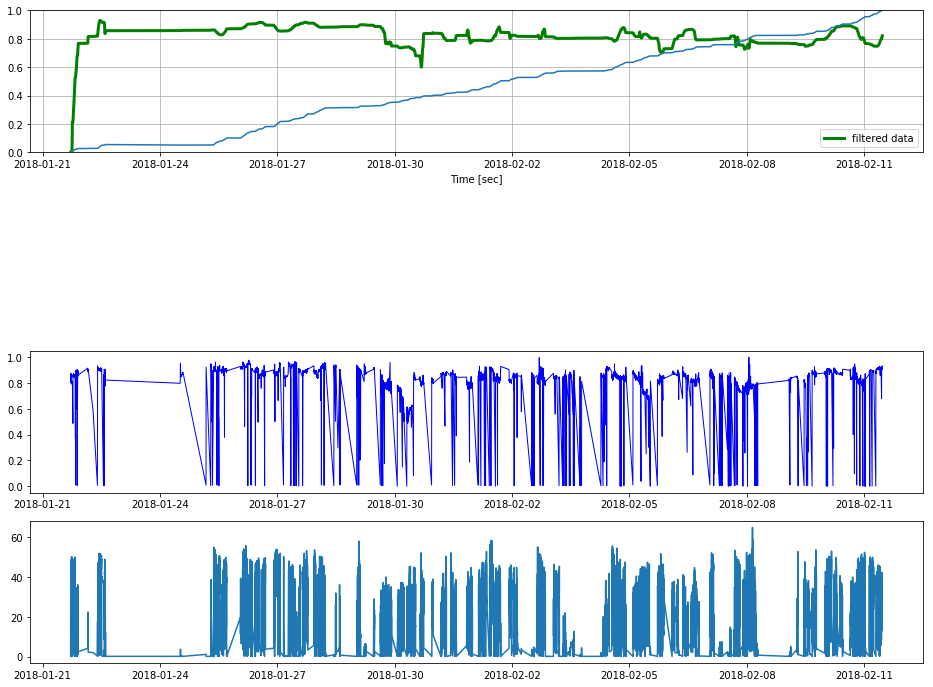

In [12]:
# Filter the data, and plot both the original and filtered signals.
fs = 4000
cuttoff = 2
y = butter_lowpass_filter(df['Fuel Level (mV)']/df['Fuel Level (mV)'].max(), cutoff, fs, order, ftype= False)

t = np.linspace(0, 100, len(y), endpoint=False)
plt.subplot(4, 1, 1)
plt.plot(df.Timestamp, y, 'g-', linewidth=3, label='filtered data')
plt.ylim(0,1)
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(df.Timestamp, df['Fuel Level (mV)']/df['Fuel Level (mV)'].max(), 'b-', linewidth=1, label='data')

plt.subplot(4, 1, 1)
plt.plot(df.Timestamp, df['Cumulative Distance']/df['Cumulative Distance'].max());

plt.subplot(4, 1, 4)
plt.plot(df.Timestamp, df.Speed);
plt.rcParams['figure.figsize'] = [16,12]

In [5]:
len(y), len(t)

(33070, 33070)

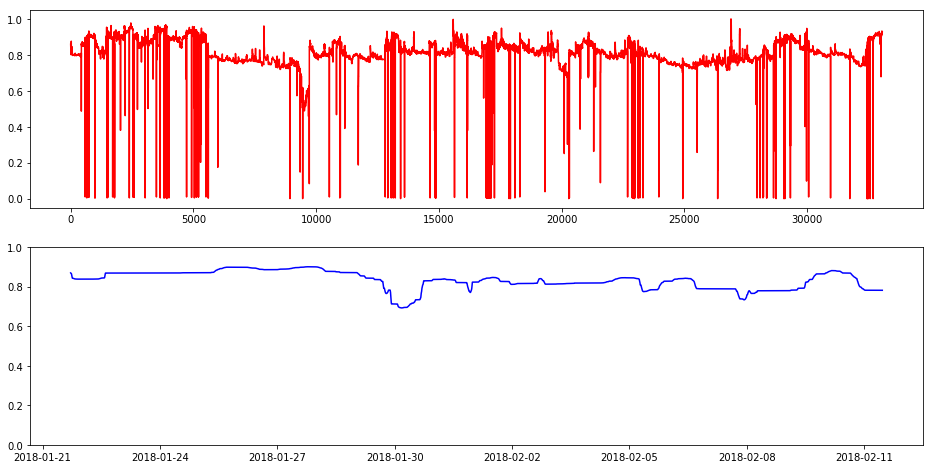

In [15]:
data = df['Fuel Level (mV)']/df['Fuel Level (mV)'].max()
cutoff = 2
nyq = 0.5 * fs
nq_cutoff = cutoff / nyq
B, A = sg.butter(5, nq_cutoff, output='ba')
smooth_data = sg.filtfilt(B,A, data)
plt.subplot(2,1,1)
plt.plot(data,'r-')

plt.subplot(2,1,2)
plt.ylim(0,1)
plt.plot(df['Timestamp'], smooth_data,'b-')

plt.rcParams['figure.figsize'] = [16,8]